## HW 5 : Movie Domestic % Gross

The movie reviews website was very happy with your deliverable for the previous assignment and now they have a new request for you. The previous consultant had created a chart for them which is illustrated on the next slide. 

However the Python code used to create the diagram has since been lost and cannot be recovered. Your task is to come up with the code that will re-create the same chart making it look as close as possible to the original 

A new dataset has been supplied

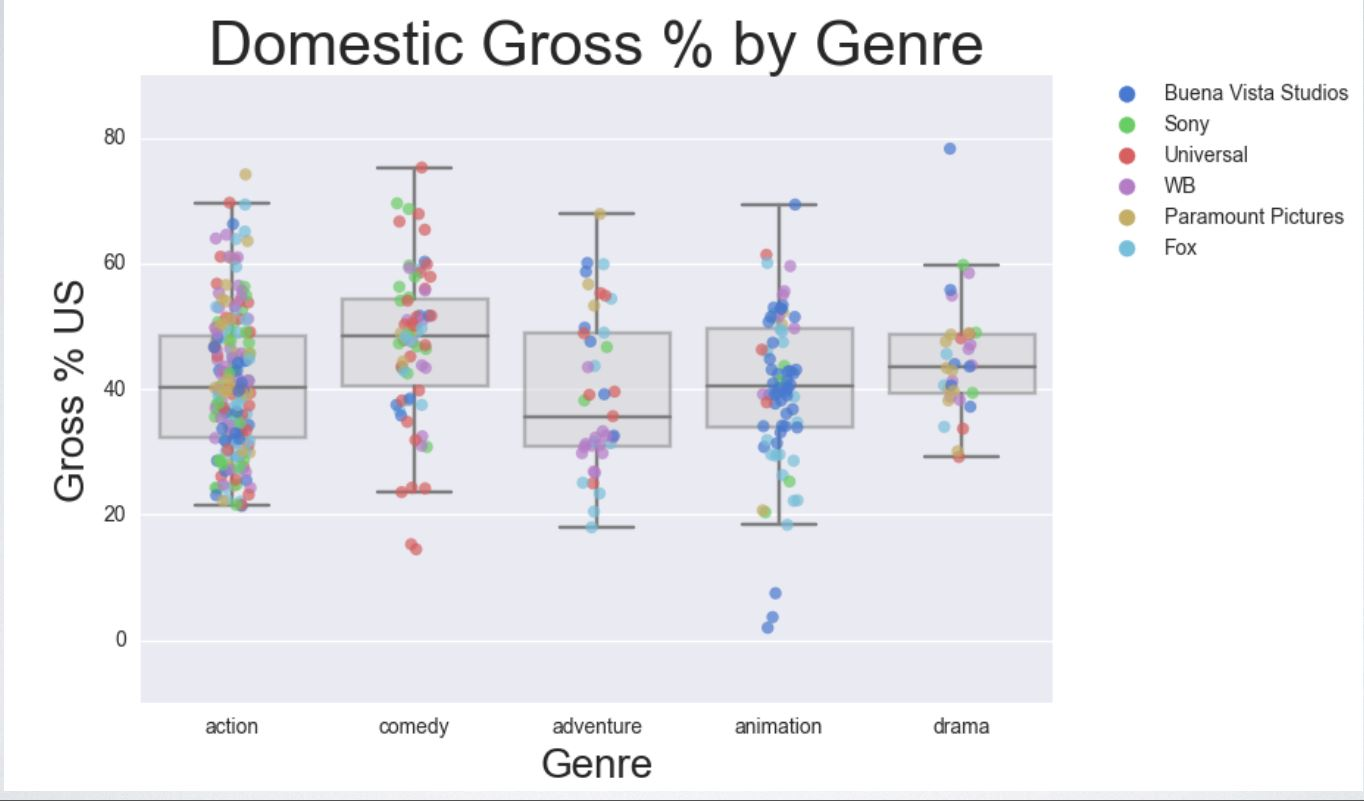

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import the data
mov = pd.read_csv('Section6-Homework-Data.csv', encoding = 'latin1')

In [3]:
# Explore the dataset
mov.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [4]:
# Check the summary of the dataframe
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [5]:
# Check the structure of the dataframe
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [6]:
# Explore the types of categorical variable Studio, used in the assignment
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [7]:
# Explore the types ofcategorical variable Studio, used in the assignment
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [12]:
# Filter the dataframe by genre
# mov2 = mov[(mov.Genre == 'action') | (mov.Genre == 'adventure') | (mov.Genre == 'animation') \
#            | (mov.Genre == 'comedy') | (mov.Genre == 'drama')]

genre_filters = ['action', 'comedy', 'adventure', 'animation', 'drama']
mov2=mov[mov.Genre.isin(genre_filters)]

In [13]:
# Filter the dataframe by studio
# mov3 = mov2[(mov2.Studio == 'Buena Vista Studios') | (mov2.Studio == 'Fox') | \
#             (mov2.Studio == 'Paramount Pictures') | (mov2.Studio == 'Sony') | \
#             (mov2.Studio == 'Universal') | (mov2.Studio == 'WB')]

studio_filters = ['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB']
mov3= mov2[mov2.Studio.isin(studio_filters)]


In [14]:
# Check how the filters worked
print (mov3.Genre.unique())
print (mov3.Studio.unique())
print (len(mov3))

['action' 'comedy' 'adventure' 'animation' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']
423


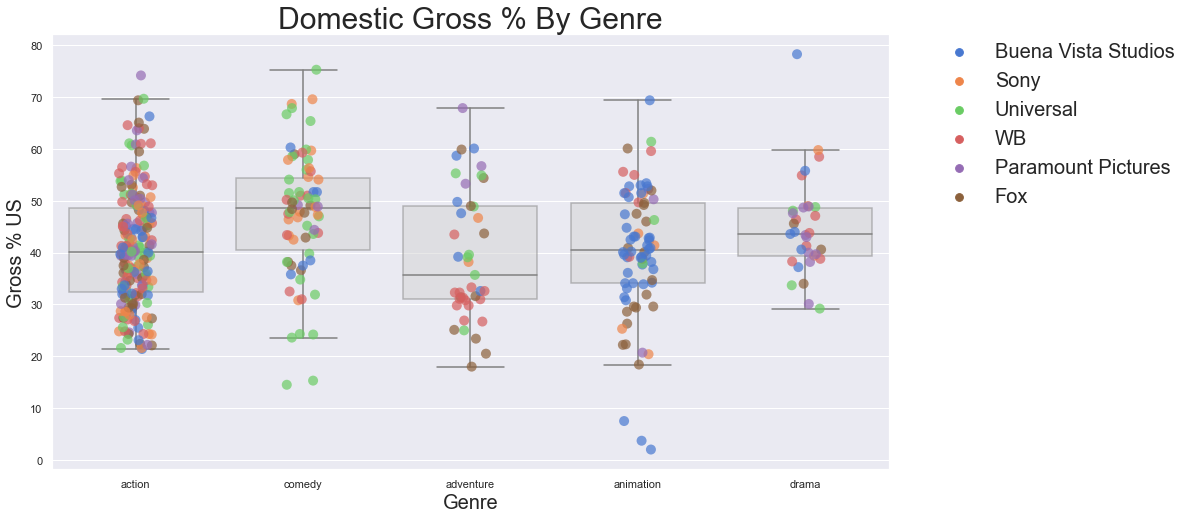

In [15]:

sns.set(rc={'figure.figsize':(15,8)})
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data=mov3, x='Genre', y='Gross % US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(x='Genre', y='Gross % US', data=mov3, jitter=True, size=10, linewidth=0, hue = 'Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % By Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':20}, \
          frameon=False, fancybox=False, shadow=False, framealpha=1)


